In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Equador.csv'

serie_equ = pd.read_csv(url)
serie_equ.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_equ['Date'] = pd.to_datetime(serie_equ['Date'],format='%Y-%m-%d')
serie_equ.set_index('Date',inplace=True)
serie_equ.head()

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [ ]:
# Selecionando apenas os primeiros meses do dataset
serie_equ = serie_equ[0:161]

In [ ]:
treino = serie_equ[0:131]
teste = serie_equ[131:161]

In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1334.976, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1308.390, Time=0.22 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1310.312, Time=2.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1316.537, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1310.333, Time=0.65 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1309.297, Time=0.40 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1311.225, Time=0.90 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.70 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1334.778, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1305.763, Time=0.67 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1307.745, Time=2.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1314.219, Time=0.45 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1307.750, Time=0.86 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1309.741, Time=1.78 sec
 ARIM

In [ ]:
step2 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1296.400, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1334.976, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1313.320, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1305.763, Time=0.36 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1336.686, Time=0.12 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1298.383, Time=1.28 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1298.379, Time=2.00 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1310.553, Time=0.64 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1300.383, Time=4.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1304.552, Time=0.31 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1298.384, Time=0.90 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1307.178, Time=1.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1308.390, Time=0.22 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1305.387, Time=0.48 sec
 ARIMA(2,1,0)(0,1,1

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

In [ ]:
future_forecast1 = step2.predict(n_periods=len(teste))

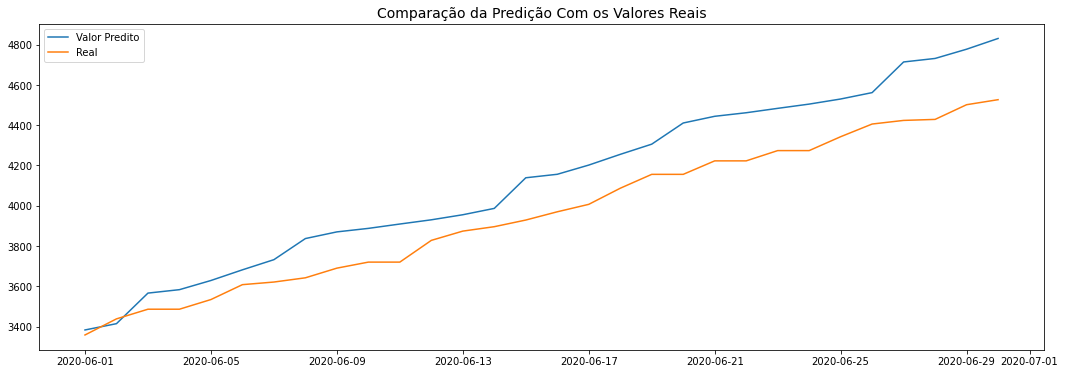

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 169.81329732884709
MAPE: 0.04177577044259137
RMSE: 186.53570710043093


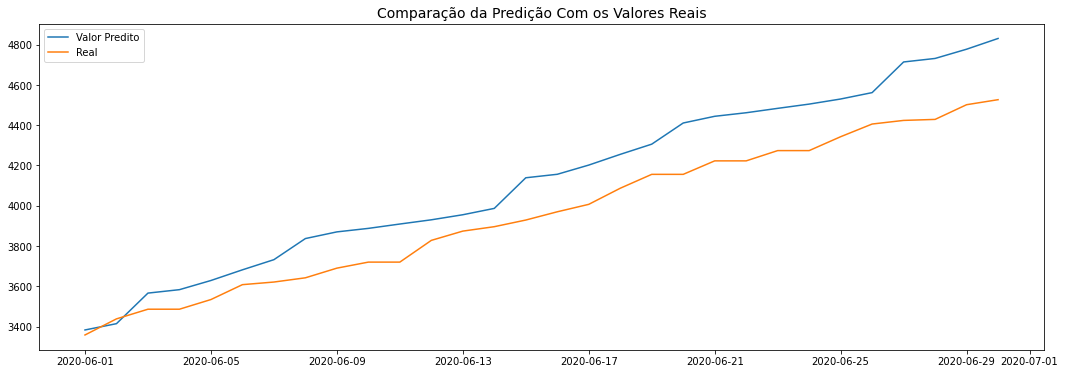

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 169.81329732884709
MAPE: 0.04177577044259137
RMSE: 186.53570710043093
